(679, 1)
(679, 1)


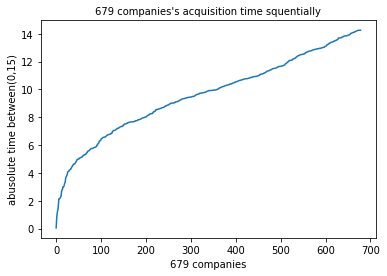

In [51]:
#load data
import pandas
import numpy
dataset_absolute = pandas.read_csv('top400seq.txt', delim_whitespace=True, nrows=1, index_col=None, header=None)
dataset = pandas.read_csv('top400seq.txt', delim_whitespace=True, nrows=1, index_col=None, header=None)
# print(dataset_absolute,dataset)

for i in range(len(dataset_absolute.columns)):
    dataset[i] = dataset_absolute[i]-dataset_absolute[i-1] if(i!=0) else dataset_absolute[i]
# print(dataset_absolute,dataset)

#change data form from[1,679] to[679,1]
dataset =numpy.array(dataset)
dataset=numpy.reshape(dataset,(679,1),)
print(dataset.shape)
dataset_absolute =numpy.array(dataset_absolute)
dataset_absolute=numpy.reshape(dataset_absolute,(679,1),)
print(dataset_absolute.shape)

#draw data
import matplotlib.pyplot as plt
plt.plot(dataset_absolute)
plt.title("679 companies's acquisition time squentially",fontsize = 10)
plt.xlabel("679 companies")
plt.ylabel("abusolute time between(0,15)")
plt.savefig('origin-data.png')
plt.show()
# plt.plot(dataset)
# plt.show()

# fix random seed for reproducibility
numpy.random.seed(7)
# normalize the dataset making to between[0,1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# print(dataset)
# split into train and test sets of 67% and 33%
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(len(trainX))
print(len(testX))
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)
import math
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
from sklearn.metrics import mean_squared_error
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [5]:
print(dataset.shape)

(144, 1)


In [39]:
import pandas
import numpy
dataset = pandas.read_csv('top400seq.txt', delim_whitespace=True, nrows=1, index_col=None, header=None)

In [40]:
dataset =numpy.array(dataset)
dataset=numpy.reshape(dataset,(679,1),)

In [41]:
dataset=pandas.DataFrame(dataset)

In [42]:
pandas.DataFrame.insert(dataset, loc=0, column = "", value=numpy.arange(679))

In [44]:
dataset.to_csv('acquisitions-time.csv', header=['Company No.', 'Year No.'])

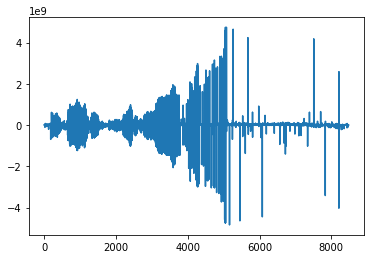

In [74]:
import numpy
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('bitcoin_single_addr.csv', usecols=[2], engine='python')
plt.plot(dataset)
plt.show()

In [75]:
dataset =numpy.array(dataset)
print(dataset.shape)

(8481, 1)


In [76]:
dataset_one=dataset
for i, element in enumerate(dataset): 
    element=1 if element>0 else -1
    dataset_one[i]=element

In [77]:
print(dataset_one.max())
print(dataset_one.min())

1
-1


In [79]:
print(dataset_one.shape)

(8481, 1)


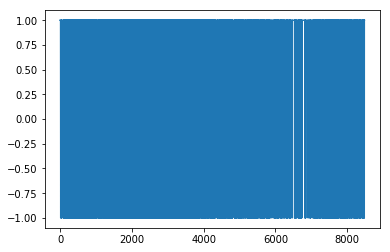

In [80]:
plt.plot(dataset_one)
plt.show()

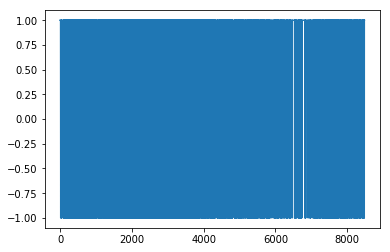

In [83]:
dataset=dataset_one
plt.plot(dataset)
plt.show()

In [84]:
# fix random seed for reproducibility
numpy.random.seed(7)
# normalize the dataset making to between[0,1]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# print(dataset)
# split into train and test sets of 67% and 33%
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(len(trainX))
print(len(testX))
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

5682 2799
5678
2795


//anaconda/envs/tensorflow/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [85]:
# create and fit the LSTM network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(trainX, trainY, nb_epoch=20, batch_size=1, verbose=2)

Epoch 1/20
68s - loss: 0.1888
Epoch 2/20
64s - loss: 0.1649
Epoch 3/20
64s - loss: 0.1649
Epoch 4/20
60s - loss: 0.1649
Epoch 5/20
60s - loss: 0.1647
Epoch 6/20
60s - loss: 0.1647
Epoch 7/20
59s - loss: 0.1646
Epoch 8/20
59s - loss: 0.1645
Epoch 9/20
59s - loss: 0.1646
Epoch 10/20
59s - loss: 0.1644
Epoch 11/20
59s - loss: 0.1644
Epoch 12/20
58s - loss: 0.1644
Epoch 13/20
58s - loss: 0.1641
Epoch 14/20
58s - loss: 0.1645
Epoch 15/20
59s - loss: 0.1641
Epoch 16/20
58s - loss: 0.1642
Epoch 17/20
59s - loss: 0.1643
Epoch 18/20
59s - loss: 0.1644
Epoch 19/20
59s - loss: 0.1641
Epoch 20/20
58s - loss: 0.1643


In [2]:
import time
timeArray = time.localtime(1409654544)
print(timeArray)

time.struct_time(tm_year=2014, tm_mon=9, tm_mday=2, tm_hour=18, tm_min=42, tm_sec=24, tm_wday=1, tm_yday=245, tm_isdst=0)


In [3]:
otherStyleTime = time.strftime("%Y-%m-%d %H:%M:%S", timeArray)

In [4]:
print(otherStyleTime)

2014-09-02 18:42:24


In [6]:
timelast =time.strftime("%Y-%m-%d %H:%M:%S",  time.localtime(1489080854))
print(timelast)

2017-03-10 01:34:14


In [7]:
model.fit(bitcoin_amount_trainX, bitcoin_amount_trainY, nb_epoch=20,
          batch_size=5, verbose=2)

NameError: name 'model' is not defined